In [28]:
!pip install pandas_datareader

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
def get_stock(stock, start, end):
     return pdr.get_data_yahoo(stock, start, end)['Adj Close']

In [3]:
def bollinger(stock, start, end, window):
    
    df_prices = pd.DataFrame(get_stock(stock, start, end))
    
    df_prices['ma'] = df_prices.loc[:]['Adj Close'].rolling(window).mean()
    
    df_prices['std'] = df_prices.loc[:]['Adj Close'].rolling(window).std()
    
    df_prices['Upper Band'] = df_prices.loc[:]['ma'] + (df_prices.loc[:]['std']*2)
    
    df_prices['Lower Band'] = df_prices.loc[:]['ma'] - (df_prices.loc[:]['std']*2)
    
    return df_prices

### 1. Get Stock price and Bollinger Bands data ###

In [25]:
stock = 'TSLA'
px = bollinger(stock, datetime.datetime(2017,1,1), datetime.datetime(2018,1,10), 20)
px.head()

,Adj Close,ma,std,Upper Band,Lower Band
Date,,,,,
2017-01-03,216.990005,NaN,NaN,NaN,NaN
2017-01-04,226.990005,NaN,NaN,NaN,NaN
2017-01-05,226.750000,NaN,NaN,NaN,NaN
2017-01-06,229.009995,NaN,NaN,NaN,NaN
2017-01-09,231.279999,NaN,NaN,NaN,NaN


### 2. Plot Bollinger Bands ###

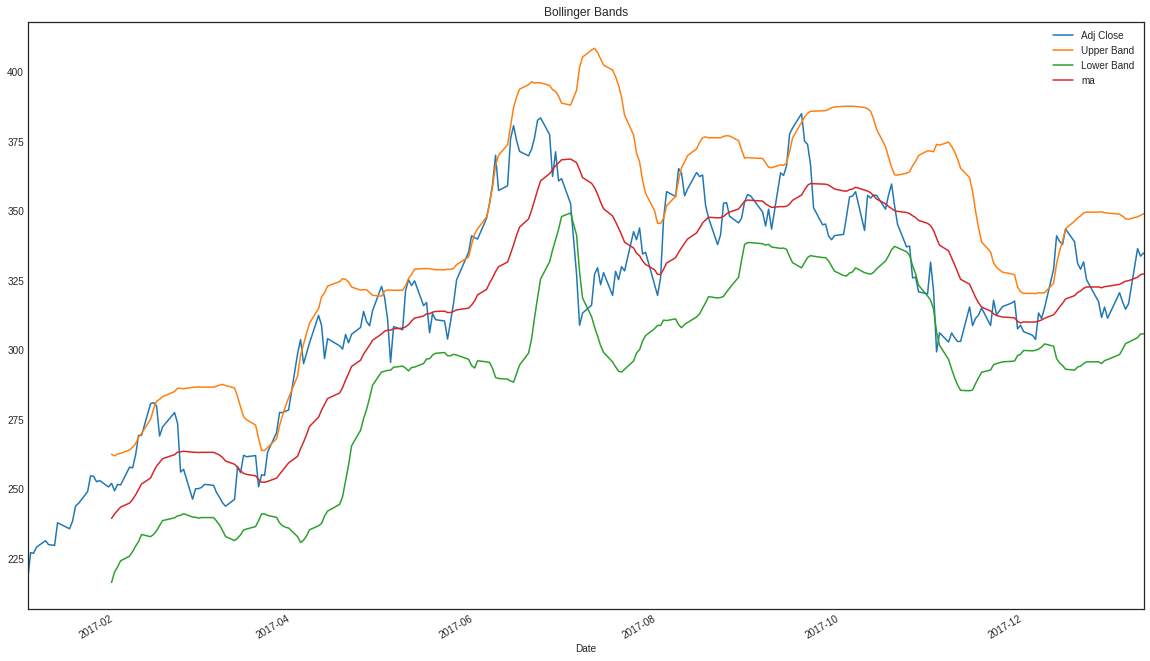

In [26]:
px.plot(y=['Adj Close', 'Upper Band', 'Lower Band', 'ma'], title='Bollinger Bands', figsize=(20,12), linewidth=1.5)

### Backtesting ### 

In [27]:
def bollinger_backtest(prices, start, end, threshold):
    #Create an "empty" column as placeholder for our /position signals
    
    if threshold == None:
        threshold = 0
    
    subset = prices.loc[start.strftime("%Y-%m-%d"):end.strftime("%Y-%m-%d")][:]
    
    subset['buy'] = 0
    subset['sell'] = 0
    
    subset['buy'] = np.where((subset['Adj Close']*(1-threshold)) <= subset['Lower Band'], 1, 0)
    subset['sell'] = np.where((subset['Adj Close']*(1+threshold)) >= subset['Upper Band'], 1, 0)
    
    return subset

In [30]:
df_backtest = bollinger_backtest(px, datetime.datetime(2017,2,1), datetime.datetime(2018,1,10), 0.01)

Text(0.5,1,'Simple plot')

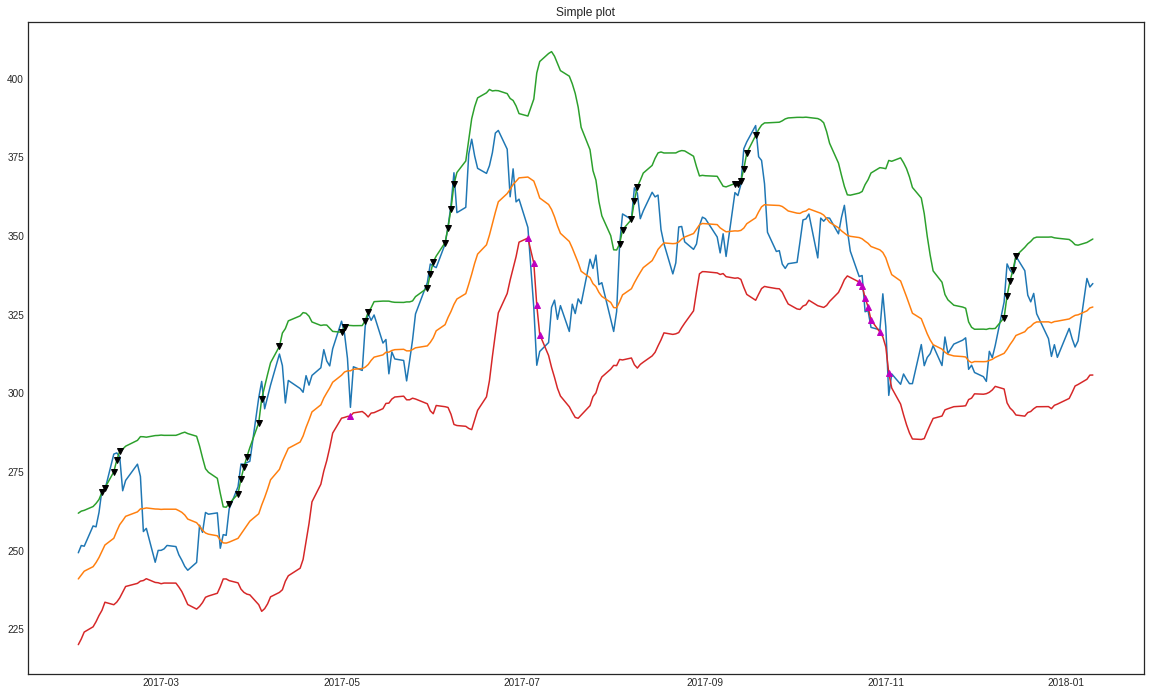

In [31]:
# Just a figure and one subplot
f, ax = plt.subplots(figsize=(20,12))
ax.plot(df_backtest[['Adj Close', 'ma', 'Upper Band', 'Lower Band']], linewidth=1.5)
ax.plot(df_backtest[df_backtest['buy'] == 1].index, df_backtest[df_backtest['buy'] == 1].loc[:]['Lower Band'], '^', color='m')
ax.plot(df_backtest[df_backtest['sell'] == 1].index, df_backtest[df_backtest['sell'] == 1].loc[:]['Upper Band'], 'v', color='k')
ax.set_title('Simple plot')

#fig.plot(px, y=['NVDA','20 ma', 'Upper Band', 'Lower Band'], title='Bollinger Bands', figsize=(20,12))

,BABA,ma,std,Upper Band,Lower Band,signal,buy,sell
Date,,,,,,,,


Text(0.5,1,'Simple plot')

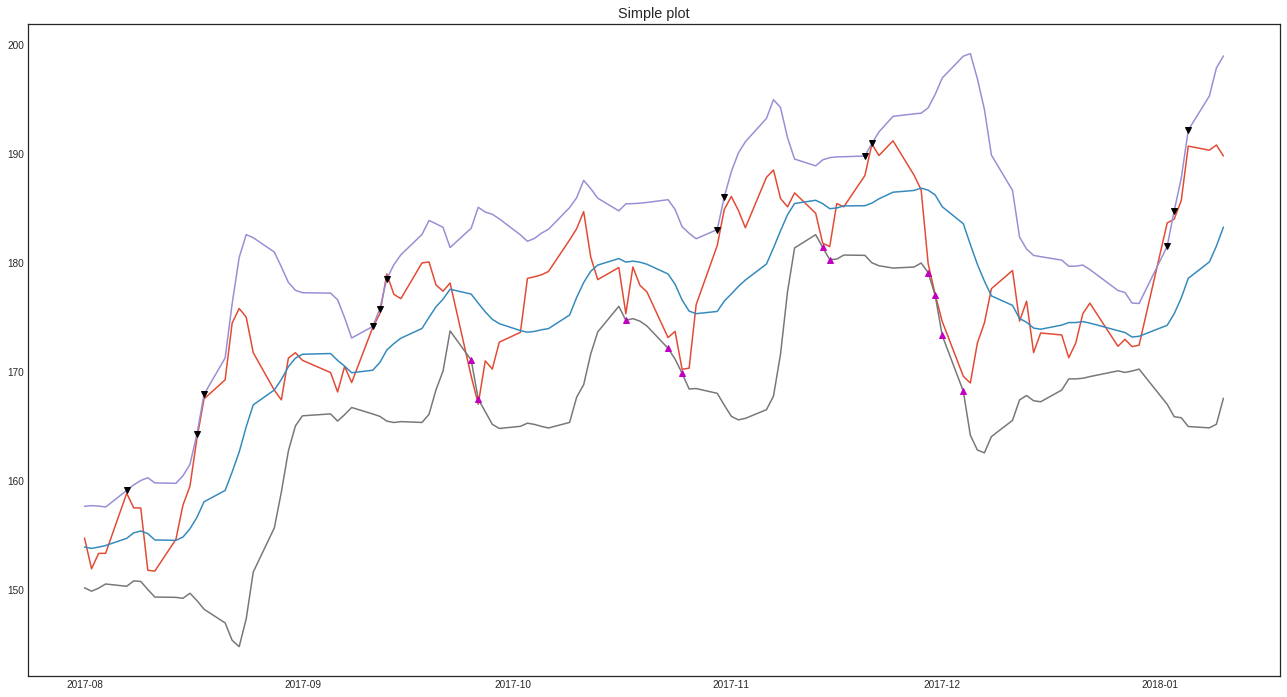